# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [145]:
# Add your imports here
import pandas as pd
import os
import numpy as np
import matplotlib as plt
from datetime import datetime, date, time

In [146]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [147]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [148]:
# Write your code here

"""
Add the datafolder path and the extension .csv.zip to the given filename
"""
def format_path(name):
    return os.path.join(LEGO_DATA_FOLDER, '{}.csv.zip'.format(name))

# Import each csv into a dataframe, taking the first column (id) as the index colum
colors = pd.read_csv(format_path('colors'))
inventories = pd.read_csv(format_path('inventories'))
inventory_parts = pd.read_csv(format_path('inventory_parts'))
inventory_sets = pd.read_csv(format_path('inventory_sets'))
part_categories = pd.read_csv(format_path('part_categories'))
parts = pd.read_csv(format_path('parts'))
sets = pd.read_csv(format_path('sets'))
themes = pd.read_csv(format_path('themes'))

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

### Inconsistencies

#### Sets Time Range
Several inconsistencies exist including:
1. 70s and 80s are considered big values while in reality, they mean 1970's and 1980's. The inconsistency in how the year was inputed results in 80s being considered the max value of the range, which is obviously false since the biggest value is 2017.
2. Negative values of year
3. Typos. For example: 19955 instead of 1995

#### Average Quantity of Inventory Parts
Quantity values of infinity are included in the data set, making it impossible to calculate the average. 


In [149]:
inventory_parts = inventory_parts.replace(-np.inf, np.nan)
inventory_parts.quantity.mean()

3.836938260983857

In [150]:
sets.loc[sets.year == '70s', 'year'] = 1970
sets.loc[sets.year == '80s', 'year'] = 1980
sets['year'] = sets['year'].astype(np.int64).abs()
sets['year'] = sets['year'].astype(str).str[:4]
# Convert all the years in str to int64
sets.year = pd.to_numeric(sets.year)
min, max = sets.year.min(), sets.year.max()
min, max

(1950, 2017)

#### Inventory Parts: 
Replaced infinity values to NaN values. Since a value of infinity cannot be used to calculate average, these values will be excluded when using NaN.

#### Sets Time Range:

1. Converted 70s to 1970
2. Converted 80s to 1980
3. Converted the column 'year' to have a data type with integer value and replaced each value with its absolute value
4. Only kept the first four digits of each year (hence 19955 --> 1995)

### A3. Querying phase
Answer the following queries using the functionality of Pandas:

1. List the ids of the inventories that belong to sets that contain cars. (Hint: Find a smart way to distinguish which sets contain cars based on the sets' name).
2. Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
3. Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
4. Create a scatter plot of the luminance* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

*The luminance of a color is a measure of brightness which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [151]:
# Write your code here
#Q1 Solution
car_df = sets[sets['name'].str.contains(" (c|C)ar(s|$|\s)", regex=True)]
car_df.id

/Users/judygong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


27           10002-1
50           10022-1
53           10025-1
142          10158-1
154          10170-1
182          10200-1
295          10552-1
325          10589-1
335          10600-1
376          10673-1
446          1076-22
505           1109-1
600          11908-1
705           1247-1
715           1253-1
717           1255-1
852           1361-1
858            137-2
918           1467-1
922            147-1
926           1477-1
933           1489-1
939           1496-1
957           1517-1
958           1518-1
1004           157-3
1038          1610-1
1043          1612-1
1097           167-1
1207          1825-1
            ...     
7623          7119-1
7800          7236-2
7807          7241-1
7898         7324-20
7945          7424-2
8011         75023-6
8227         7553-16
8228         7553-17
8229         7553-18
8316         75821-1
8485          7611-1
8486          7612-1
8565         7687-20
8566         7687-21
8807          7902-1
8842         7907-15
9279         

/Users/judygong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


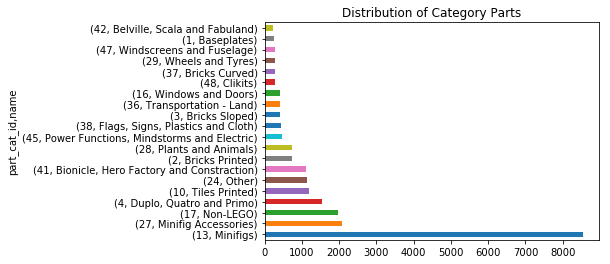

In [152]:
# Write your code here
# 1.find all the lines with car/Car/cars/Cars using a regular expression
cars_df = sets[sets.name.str.contains(" (c|C)ar(s|$|\s)", regex=True)]

# 2. plot distribution of part categories
# Merge the parts without the name colum (we don't want parts name), with categories
parts_df = pd.merge(parts[['id', 'part_cat_id']], part_categories, left_on=['part_cat_id'], right_on=['id'], how='outer')
# Group by part_cat_id (and its specific name, which doesn't have any effect on the grouping), and get the top 20 largest counts of parts
counts_by_parts_df = parts_df.groupby(['part_cat_id', 'name']).size().nlargest(20)
counts_by_parts_df.plot(x='name', y='counts', kind='barh', title='Distribution of Category Parts')

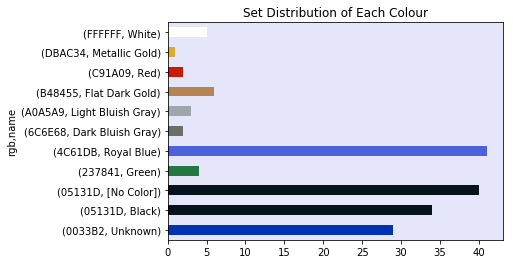

In [153]:
# 3. Find the dominant color of each set. 
# Then, plot using a (horizontal) bar chart, 
# the number of sets per dominant color. 
# Color each bar with the respective color that it represents.

# rename to differentiate between inventories
inventory_sets_renamed = inventory_sets.rename(index=str, columns={"quantity": "inventory quantity"})
inventory_parts_renamed = inventory_parts.rename(index=str, columns={"quantity": "part quantity"})

# match color_id with inventory_sets
sets_with_color = pd.merge(inventory_sets_renamed, inventory_parts_renamed[['inventory_id', 'color_id', 'part_id', 'part quantity']], how='inner').dropna()
# drop all rows with only color infos
sets_with_color_names = pd.merge(sets_with_color, colors[['id', 'rgb', 'name']], left_on=['color_id'], right_on=['id'], how='inner').dropna()

# calculate total number of parts per set
sets_with_color_names['total number of parts per set'] = sets_with_color_names['part quantity'] * sets_with_color_names['inventory quantity']
sets_with_color_counts = sets_with_color_names.groupby(['set_id', 'color_id', 'name', 'rgb'])['total number of parts per set'].sum().reset_index(name='count')

# find the dominant color per set
dominant_color_per_set = sets_with_color_counts.iloc[sets_with_color_counts.groupby(['set_id']).apply(lambda x: x['count'].idxmax())]
nb_sets_per_dominant_color = dominant_color_per_set.groupby(['rgb', 'name'])['set_id'].size()

# Prepare to plot the graph
color_list = nb_sets_per_dominant_color.reset_index(name='Set per color')
color_rgb = ['#' + color for color in color_list['rgb']]
graph = nb_sets_per_dominant_color.plot(x='name', kind='barh', color=color_rgb, title='Set Distribution of Each Colour')
graph
graph.set_facecolor('#e6e6fa')

Question 4:

We received mixed information on whether we should plot the luminance of the dominant color of each set, or if we should plot all the luminances for each set. In order to address this inconsistency, we have decided to present both graphs. The first graph displays the luminance of only the dominant color, and the second graph displays all luminances of each set.

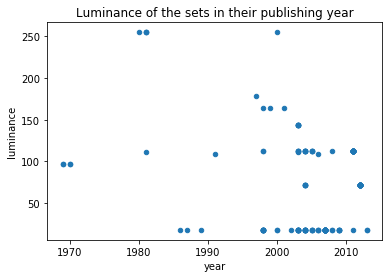

In [154]:
# 4. Create a scatter plot of the luminance* of the sets vs their publishing year. 
# What do you observe for the years 1980-1981? How do you interpret what you see?
#sets['luminance'] = sets.apply(lambda row: np.sqrt(0.299* R**2 + 0.587* G**2 + 0.114*G**2) row[''])

# sets_year_with_inventory_id = pd.merge(sets[['id', 'year']], inventory_sets[['inventory_id', 'set_id']], left_on=['id'], right_on=['set_id'], how='inner')
# sets_year_with_color = pd.merge(sets_year_with_inventory_id, inventory_parts[['inventory_id', 'color_id']], how='inner')
# sets_year_with_color_rgb = pd.merge(sets_year_with_color, colors[['id', 'rgb']], left_on=['color_id'], right_on=['id'], how='inner')

dominant_color_per_set_year = pd.merge(sets[['id', 'year']], dominant_color_per_set, left_on=['id'], right_on=['set_id'], how='right')

# extract 0:2, 2:4 and 4:6 of rgb into R, G, B arrays interpreted as int of base 16 (hexadecimal)
dominant_color_per_set_year['R2'] = dominant_color_per_set_year['rgb'].apply(lambda color: int(color[0:2], 16)**2)
dominant_color_per_set_year['G2'] = dominant_color_per_set_year['rgb'].apply(lambda color: int(color[2:4], 16)**2)
dominant_color_per_set_year['B2'] = dominant_color_per_set_year['rgb'].apply(lambda color: int(color[4:6], 16)**2)


#sets_year_color_count = sets_year_with_color_rgb.groupby(['set_id', 'rgb']).size().reset_index(name='color count')
#sets_year_color_count
#sets_color = sets_year_color_count.groupby(['set_id']).apply(lambda x: x.loc[x['color count'] == x['color count'].max()])
luminance_year = dominant_color_per_set_year['year'].copy().to_frame()
luminance_year['luminance'] = np.sqrt(0.299*dominant_color_per_set_year['R2'] + 0.587*dominant_color_per_set_year['G2'] + 0.114*dominant_color_per_set_year['B2'])
#luminance_year = luminance_year.drop_duplicates()

luminance_year.plot(x='year', y='luminance', kind='scatter', title='Luminance of the sets in their publishing year')

In [155]:
# 4. Create a scatter plot of the luminance* of the sets vs their publishing year. 
# What do you observe for the years 1980-1981? How do you interpret what you see?

sets_ids = pd.merge(inventory_sets, sets, left_on='set_id', right_on= 'id', how='left')
inventory_ids = pd.merge(sets_ids, inventory_parts, left_on='inventory_id', right_on= 'inventory_id', how='left')
color_ids = pd.merge(colors, inventory_ids, left_on='id', right_on= 'color_id', how='inner')

R = color_ids.rgb.astype(str).apply(lambda x: int(x[0:2], 16))
G = color_ids.rgb.astype(str).apply(lambda x: int(x[2:4], 16))
B = color_ids.rgb.astype(str).apply(lambda x: int(x[4:6], 16))
color_ids['luminance'] = (0.299 * R**2 + 0.587 * G**2 + 0.114 * B**2)**(1/2)
color_ids['year'] = color_ids.year.astype(np.int64)

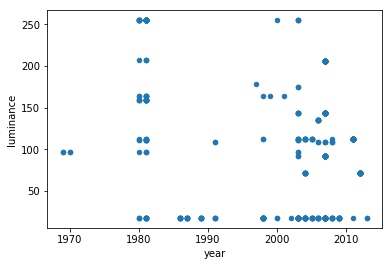

In [156]:
ax = color_ids.plot(kind='scatter', x='year', y='luminance')
ax

In both graphs, we notice that over the last few years, LEGO started to produce steadily sets' with lower luminance (the points inline on the bottom from 2000 to 2010) as (dominant) color. We also noticed that from the 2000s, LEGO's sets tends to have more variation in the luminance than the previous years, if we omit the years 1980 and 1981 in the full-color (not just dominant color) plot.

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [157]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [158]:
# Write your code here
bikes = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

#### Attribute Types

In [159]:
bikes.dtypes

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object

See above output for attribute types. In addition to above description: Passholder Type and Trip Route Category are categorical variables. Start Time and End Time are date and time attributes.

#### Attribute Value Range

In [160]:
bikes.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


#### Categorical and Redundant Attributes

In [161]:
bikes['Passholder Type'] = bikes['Passholder Type'].astype('category')
bikes['Trip Route Category'] = bikes['Trip Route Category'].astype('category')

The attributes that are categorical include:
1. Passholder Type 
2. Trip Route Category

Redundant columns include:
1. Ending/Starting Station Latitude/Longitude (these 4 attributes all depend on their respective station ID)
2. Plan Duration (plan duration depends only on passholder type)

Possible pitfalls of redundant attributes:
1. Unnecessary increase of dataframe size
2. Decrease in efficiency when doing computation on the dataframe due to size increase
3. May cause data inconsistency --> for example, if you update one column but forget to update the related or dependant column


### Inconsistencies

We noticed some inconsistencies in the Duration values.

1. The trips are never over 24h. The highest values found is 86400.
2. Some of the trips duration are not correctly calculated, as shown previously (ex. for trip ID 12517325, the duration between 00:32:00 and 11:12:00 of the same day should be 10.67 hours (38400 seconds), but the given duration is 11.76 hours).

In [162]:
# Convert time into real time
bikes['Start Time'] = pd.to_datetime(bikes['Start Time'])
bikes['End Time'] = pd.to_datetime(bikes['End Time'])
# Verify the Duration is all good
bikes['Real Duration'] = (bikes['End Time'] - bikes['Start Time']).dt.total_seconds()
bikes['Real Duration'] = bikes['Real Duration'].astype(int)

bikes.loc[(bikes['Duration']!=bikes['Real Duration']) & (bikes['Duration']!=86400)][['Trip ID', 'Duration', 'Real Duration']]

,Trip ID,Duration,Real Duration
76450,12531961,71280,67680
76530,12531865,55560,51960
76537,12517325,42000,38400
123230,21945889,56340,59940
123234,21893148,2460,6060
123235,21949898,54480,58080


For stations' latitude and longitude, we also noticed that we need to drop duplicates not only when the 3 values (Station ID, Latitude, Longitude) are the same, but by filtering the Station ID. Some records of the Latitude and Longitude for the same station are not exactly the same, as we can see for Station 3005. The longitude is slightly off in the 55509th record.

In [163]:
# Get all stations informations
starting_stations = bikes[['Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude']]
starting_stations = starting_stations.rename(index=str, columns={"Starting Station ID": "Station ID", "Starting Station Latitude": "Station Latitude", "Starting Station Longitude":"Station Longitude"})
ending_stations = bikes[['Ending Station ID', 'Ending Station Latitude', 'Ending Station Longitude']]
ending_stations = ending_stations.rename(index=str, columns={"Ending Station ID": "Station ID", "Ending Station Latitude": "Station Latitude", "Ending Station Longitude":"Station Longitude"})
station_coordinates = pd.concat([starting_stations, ending_stations], axis=0, sort=True)

station_coordinates.loc[stations['Station ID'] == 3005].drop_duplicates().head()

,Station ID,Station Latitude,Station Longitude
25,3005.0,34.04855,-118.259050
55509,3005.0,34.04855,-118.259048


In [164]:
station_coordinates = station_coordinates.drop_duplicates(subset='Station ID').dropna(how='all').sort_values(by='Station ID').reset_index(drop=True)
station_coordinates['Station ID'] = station_coordinates['Station ID'].astype(int)
station_coordinates.head()

,Station ID,Station Latitude,Station Longitude
0,3000,NaN,NaN
1,3005,34.048550,-118.25905
2,3006,34.045540,-118.25667
3,3007,34.050480,-118.25459
4,3008,34.046612,-118.26273


Furthermore, for the passholder types, we noticed that there is a row where Monthly Pass is missing the value for Plan Duration (which should be 30 days). We decided to drop that row in the Passholder table to keep consistency. See below example for details.

In [165]:
#New table with Passholder type and plan durations
pass_holders = bikes.iloc[:, 6:8].drop_duplicates()
pass_holders

,Passholder Type,Plan Duration
0,Monthly Pass,30.0
2,Flex Pass,365.0
4,Walk-up,0.0
55790,Staff Annual,NaN
98675,Monthly Pass,NaN


In [166]:
pass_holders = pass_holders.drop([98675]) #drop row where monthly pass has NaN plan duration
pass_holders

,Passholder Type,Plan Duration
0,Monthly Pass,30.0
2,Flex Pass,365.0
4,Walk-up,0.0
55790,Staff Annual,NaN


In [167]:
#Clean up original df
del bikes['Ending Station Latitude']
del bikes['Ending Station Longitude']
del bikes['Starting Station Latitude']
del bikes['Starting Station Longitude']
del bikes['Plan Duration']

The original dataframe was more susceptible for data inconsistency. This is because by creating another dataframe, it is easier to update redundant or dependant columns via the new dataframe, rather than update the entire original dataframe. For example, if you wanted to update the latitude/longitude of a particular station, you just need to change one row in the station_coordinates dataframe. If this table didn't exist, you would have to search both ending and starting station IDs in the original table and change every row that contains the particular station. These added steps result in higher chance of data inconsistency (for example, if you miss a specific row, or only search the ending station IDs column, you will end up with station IDs with different coordinates).

In [168]:
print("Bikes Dataframe")
print(bikes.shape)
print(bikes.dtypes)

print("\nStation_Coordinates Dataframe")
print(station_coordinates.shape)
print(station_coordinates.dtypes)

print("\nPassHolders Dataframe")
print(pass_holders.shape)
print(pass_holders.dtypes)

Bikes Dataframe
(132427, 10)
Bike ID                       float64
Duration                        int64
End Time               datetime64[ns]
Ending Station ID             float64
Passholder Type              category
Start Time             datetime64[ns]
Starting Station ID           float64
Trip ID                         int64
Trip Route Category          category
Real Duration                   int64
dtype: object

Station_Coordinates Dataframe
(67, 3)
Station ID             int64
Station Latitude     float64
Station Longitude    float64
dtype: object

PassHolders Dataframe
(4, 2)
Passholder Type    category
Plan Duration       float64
dtype: object


__\* Briefly explain your approach here \*__


The dataframes: 

bikes: 'Bike ID', 'Trip ID', 'Start Time', 'End Time', 'Duration', 'Starting Station ID', 'Ending Station ID', 'Trip Route Category', 'Passholder Type', 'Real Duration'

station_coordinates: Station ID, Station Latitude, Station Longitude

pass_holders : Passholder Type, Plan Duration

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

,Starting Station ID,count
0,3000.0,29
1,3005.0,4883
2,3006.0,2708
3,3007.0,2785
4,3008.0,2156


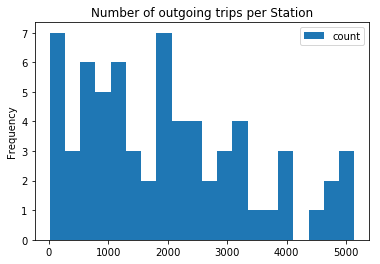

In [169]:
#Q1
import matplotlib.pyplot as plt
starting_station_count = bikes.groupby(['Starting Station ID']).size().reset_index(name='count')
starting_station_count.plot(x='Starting Station ID', kind='hist', bins=20, title='Number of outgoing trips per Station')
starting_station_count.head()

We group the trips by their Starting Station ID and count how many trips depart from each station(i.e. the number of outgoing trips). This gives the dataframe shown above. We plot the histogram accordingly by bins of 20 (i.e. Trips outgoing from Stations 0-20, 20-40, etc.)

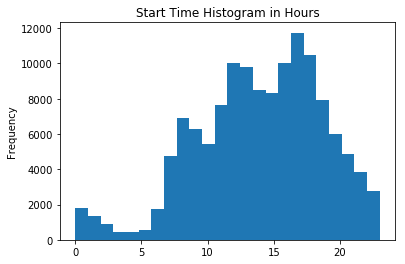

In [170]:
#Q2
bikes['Start Time'] = pd.to_datetime(bikes['Start Time'])
bikes['End Time'] = pd.to_datetime(bikes['End Time'])
bikes['Duration in hours'] = bikes['Duration'] / 3600
bikes['Start Time in hours'] = bikes['Start Time'].apply(lambda x: x.hour)
bikes['Start Time in hours'].plot(kind="hist", bins=24, title="Start Time Histogram in Hours")

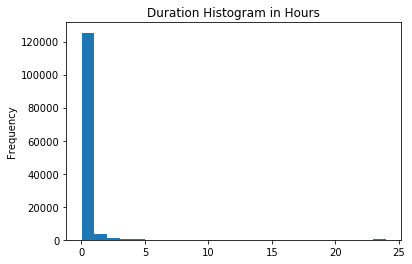

In [171]:
bikes['Duration in hours'].plot(kind="hist", bins=24, title="Duration Histogram in Hours")

A popular duration is less than 1 hour--this indicates that most bike trips are extremely short and under 1 hour. A local maximum for start time is around 17:00PM which is often when most people get off work. This is considered rush hour and hence bike start time spikes at this time, indicating it may be possible that many people are biking back home from work. 

Passholder Type,Flex Pass,Monthly Pass,Staff Annual,Walk-up
Trip Route Category,,,,
One Way,0.075509,0.648033,0.002499,0.273959
Round Trip,0.037779,0.295033,0.006492,0.660696


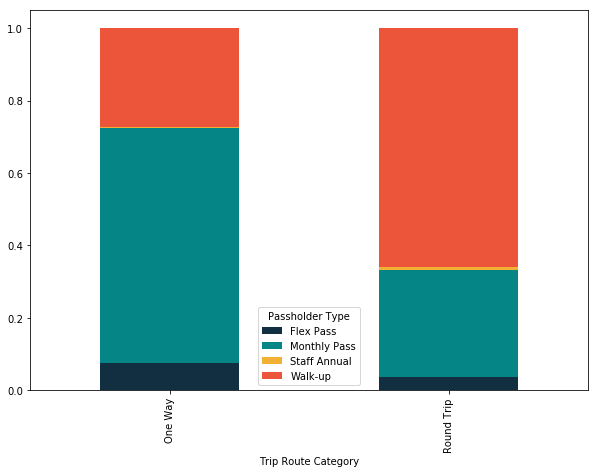

In [172]:
#Q3
temp = bikes.groupby(['Trip Route Category', 'Passholder Type']).size()
temp2 = temp.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')
pivot_df = temp2.pivot(index='Trip Route Category', columns='Passholder Type', values='proportion')

colors = ["#112F41", "#068587","#F2B134","#ED553B"]
pivot_df.loc[:,['Flex Pass','Monthly Pass', 'Staff Annual', 'Walk-up']].plot.bar(stacked=True, color=colors, figsize=(10,7))
pivot_df

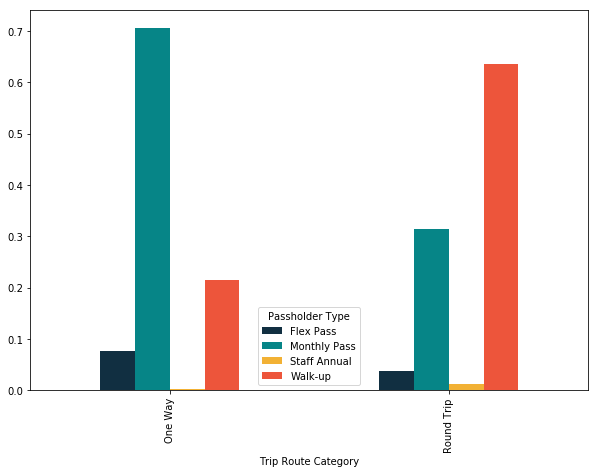

In [173]:
#Q4
bikes_filter = bikes[bikes["Start Time in hours"] < 12]
temp = bikes_filter.groupby(['Trip Route Category', 'Passholder Type']).size()
temp2 = temp.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')
pivot_df = temp2.pivot(index='Trip Route Category', columns='Passholder Type', values='proportion')
pivot_df.loc[:,['Flex Pass','Monthly Pass', 'Staff Annual', 'Walk-up']].plot.bar(stacked=False, color=colors, figsize=(10,7))

Outliers: Staff Annual has lowest proportion in both one-way and round-trip, which makes sense because there is likely few staff relative to customers. If we were conducting data analysis on consumers, we should not even include staff annual in our dataset, as they are not representative of customers.

In [174]:
#Q5
# We experimented with the hours until we get two groups where the number of outgoing bikes are close
bikes_interval1 = bikes[bikes["Start Time in hours"] < 15]
bikes_interval2 = bikes[bikes["Start Time in hours"] >= 15]
bikes_interval1.groupby(['Starting Station ID']).size().sum(), bikes_interval2.groupby(['Starting Station ID']).size().sum()

(66463, 65945)

In [175]:
temp1 = bikes_interval1.groupby(['Trip Route Category', 'Passholder Type']).size()
proportion1 = temp1.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')
temp2 = bikes_interval2.groupby(['Trip Route Category', 'Passholder Type']).size()
proportion2 = temp2.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')
proportion1['Interval'] = "Before 15:00"
proportion2['Interval'] = "At or After 15:00"
proportion_intervals = pd.concat([proportion1, proportion2])
# The following line is aimed to get a unique, not composite index
proportion_intervals.reset_index(drop=True)

,Trip Route Category,Passholder Type,proportion,Interval
0,One Way,Flex Pass,0.077116,Before 15:00
1,One Way,Monthly Pass,0.657161,Before 15:00
2,One Way,Staff Annual,0.003055,Before 15:00
3,One Way,Walk-up,0.262668,Before 15:00
4,Round Trip,Flex Pass,0.040729,Before 15:00
5,Round Trip,Monthly Pass,0.314134,Before 15:00
6,Round Trip,Staff Annual,0.008967,Before 15:00
7,Round Trip,Walk-up,0.636170,Before 15:00
8,One Way,Flex Pass,0.073897,At or After 15:00
9,One Way,Monthly Pass,0.638882,At or After 15:00


In [176]:
#above table grouped-by (nicer format for viewing)
proportion_intervals.groupby(['Trip Route Category', 'Passholder Type', 'Interval']).sum()

proportion
Trip Route Category Passholder Type Interval                     
One Way             Flex Pass       At or After 15:00    0.073897
                                    Before 15:00         0.077116
                    Monthly Pass    At or After 15:00    0.638882
                                    Before 15:00         0.657161
                    Staff Annual    At or After 15:00    0.001942
                                    Before 15:00         0.003055
                    Walk-up         At or After 15:00    0.285279
                                    Before 15:00         0.262668
Round Trip          Flex Pass       At or After 15:00    0.034649
                                    Before 15:00         0.040729
                    Monthly Pass    At or After 15:00    0.274778
                                    Before 15:00         0.314134
                    Staff Annual    At or After 15:00    0.003868
                                    Before 15:00         0.008967
                    Walk-up         At or After 15:00    0.686704
                                    Before 15:00         0.636170

With some experimentations, we split the quantity of trips into two almost-equivalent groups: before 15h and after 15h. As we observe, the proportions of the outgoing bikes are similar in these two time periods. We deduce that the proportion of trips does not depend on wheter it's the first or second hour interval. Therefore, the company would not have significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and more the second one. 